In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf


2021-11-10 20:44:17.652946: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-10 20:44:17.653071: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
modelo1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [11]:
modelo1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [12]:
hist1 = modelo1.fit(x_train, y_train, epochs=100 ,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6382 - accuracy: 0.7787 - val_loss: 0.4498 - val_accuracy: 0.8374
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3867 - accuracy: 0.8611 - val_loss: 0.3943 - val_accuracy: 0.8562
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8761 - val_loss: 0.3781 - val_accuracy: 0.8641
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8857 - val_loss: 0.3657 - val_accuracy: 0.8711
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8908 - val_loss: 0.3502 - val_accuracy: 0.8783
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8959 - val_loss: 0.3427 - val_accuracy: 0.8790
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9035 - val_loss: 0.3398 - val_ac

In [13]:
modelo2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [14]:
modelo2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
hist2 = modelo2.fit(x_train, y_train, epochs=100 ,validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6146 - accuracy: 0.7834 - val_loss: 0.4001 - val_accuracy: 0.8550
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3692 - accuracy: 0.8651 - val_loss: 0.3851 - val_accuracy: 0.8644
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3347 - accuracy: 0.8768 - val_loss: 0.3853 - val_accuracy: 0.8569
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.8859 - val_loss: 0.3402 - val_accuracy: 0.8764
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.3700 - val_accuracy: 0.8711
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.8982 - val_loss: 0.3522 - val_accuracy: 0.8730
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9021 - val_loss: 0.3358 - val_ac

In [15]:
hist1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
h1 = pd.DataFrame(hist1.history)
h2 = pd.DataFrame(hist2.history)

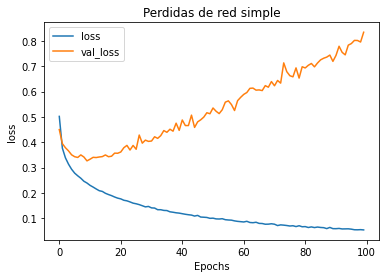

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Perdidas de red simple")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.plot(h1['loss'], label='loss')
plt.plot(h1['val_loss'], label='val_loss')
plt.legend()
plt.savefig("h1_loss")

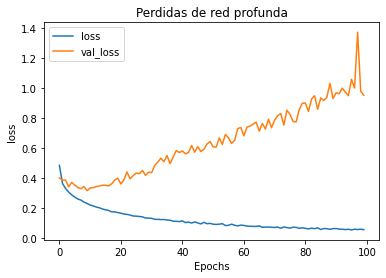

In [39]:
plt.figure()
plt.xlabel("Epochs")
plt.title("Perdidas de red profunda")
plt.ylabel("loss")
plt.plot(h2['loss'], label='loss')
plt.plot(h2['val_loss'], label='val_loss')
plt.legend()
plt.savefig("h2_loss")

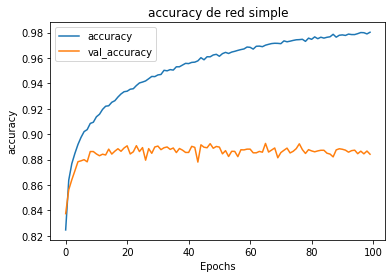

In [40]:
plt.figure()
plt.xlabel("Epochs")
plt.title("accuracy de red simple")
plt.ylabel("accuracy")
plt.plot(h1['accuracy'], label='accuracy')
plt.plot(h1['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig("h1_acc")

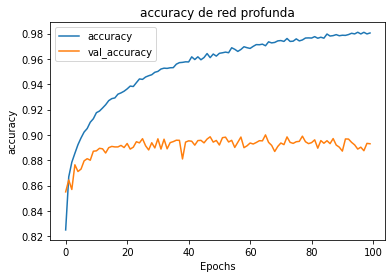

In [41]:
plt.figure()
plt.xlabel("Epochs")
plt.title("accuracy de red profunda")
plt.ylabel("accuracy")
plt.plot(h2['accuracy'], label='accuracy')
plt.plot(h2['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig("h2_acc")